In [1]:
import numpy as np
from scipy.integrate import odeint
import scipy as sp
import matplotlib.pyplot as plt
import math
from ipywidgets import interact
from IPython.display import display

In [2]:
#theta_v is the vector (Theta_1,...,Theta_n)
#omega_v is the vector of natural frequencies
#A is the adjacency matrix of the network
#S_v is vector of sums of interaction terms
#Defines function ThetaDot=f(Theta)

def Sv(theta_v,A):
    
    theta_m=np.tile(theta_v,(len(theta_v),1))
    dtheta_m=np.transpose(theta_m)-theta_m
    
    
    S=np.sum(np.multiply(np.sin(dtheta_m),A),axis=0)
    return S 

def ThetaDot(theta_v,omega_v,A):
    y=omega_v+Sv(theta_v,A)
    return y

In [11]:
#Runge-Kutta Step

def ThetaUpdate(theta_v,h,omega_v,A): 
        y=theta_v #initial
        k1 = h * ThetaDot(y,omega_v,A)
        k2 = h * ThetaDot(y + 0.5 * k1,omega_v,A) 
        k3 = h * ThetaDot(y + 0.5 * k2,omega_v,A)
        k4 = h * ThetaDot(y + k3,omega_v,A)
        
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
        y=np.mod(y,2*np.pi) #periodicity
        return y
#When h,omega, and A are unchanging


def KuraSolver(t,theta_v0,h,omega_v,A,Dur):
    Steps=int(np.floor(Dur/h)) #Number of points to solve at
    N=len(theta_v0)
    
    theta_v=theta_v0
    current_count=0
    sol=np.empty(shape=(N,len(t)-1),dtype=np.complex) 

    for k in range(0,Steps):
        theta_v=ThetaUpdate(theta_v,h,omega_v,A)
        
        if k*h>t[current_count]:
            sol[:,current_count]=theta_v
            current_count=current_count+1
    return sol

In [29]:
def KuramotoStandard(h         =0.005,
              Dur              =2*np.pi, 
              K                = 0.012,
             ):
    theta_v0         =np.zeros(10)
    N=len(theta_v0)
    omega_v          =np.multiply(np.random.uniform(-1,1,N),10)
    
    K_f=K
    Dur_f=Dur



    A=np.multiply(np.ones((N,N))-np.identity(N),K_f/N)
    t=np.linspace(0,Dur_f,1000,endpoint=False)
    y=KuraSolver(t,theta_v0,h,omega_v,A,Dur_f)
    t=t[0:-1]

    SinY=np.real(np.sin(y))
    fig, ax = plt.subplots(figsize=(15,5))
    for s in range(0,N):
        ax.plot(t, SinY[s,:], 'r', label='1')
    plt.title('Simulation of a Kuramoto System')
    plt.xlabel('time')
    plt.ylabel('\sin(\theta)')

    plt.show()
    
    A

In [32]:
interact(KuramotoStandard,h       =(0.005,0.01,0.001),
                          Dur      =2*np.pi, 
                          K        = (0,60,1));

interactive(children=(FloatSlider(value=0.005, description='h', max=0.01, min=0.005, step=0.001), FloatSlider(…

0.4603014185333385

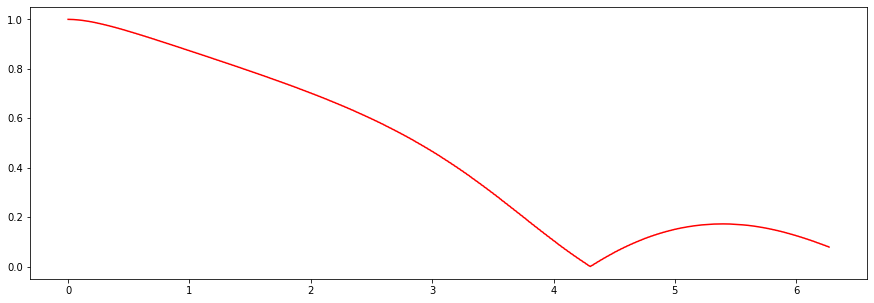

In [62]:
S=np.sum(np.exp(np.multiply(y,1.j)),axis=0)
R=np.abs(np.multiply(1/N,S))
         
plt.figure(figsize=(15,5))
         
plt.plot(t, R, 'r', label='1')
np.mean(R)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


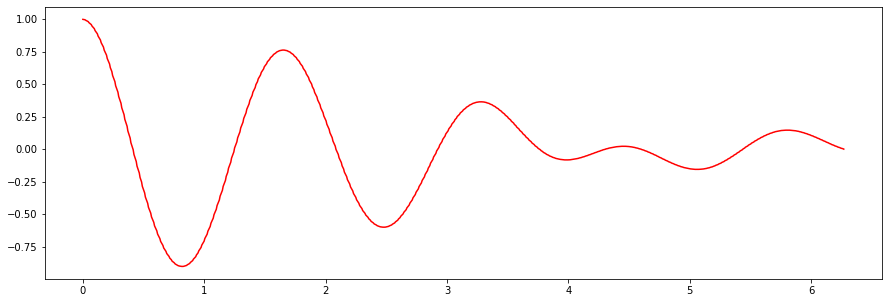

In [63]:
plt.figure(figsize=(15,5))
         
plt.plot(t, S*(1/10), 'r', label='1')

In [64]:
fou=sp.fft.fft(S*(1/10))
xt = sp.fft.fftfreq(len(t), Dur/ len(t) )

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


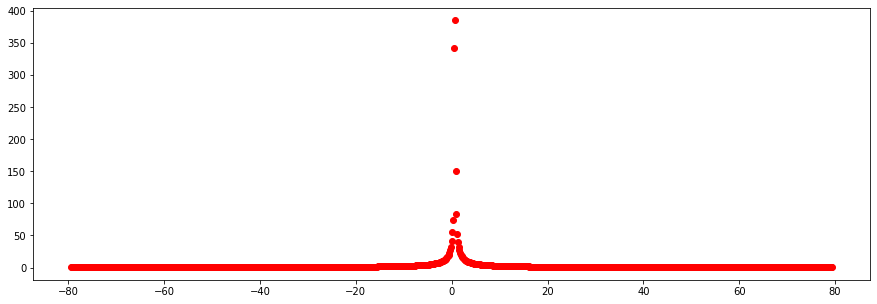

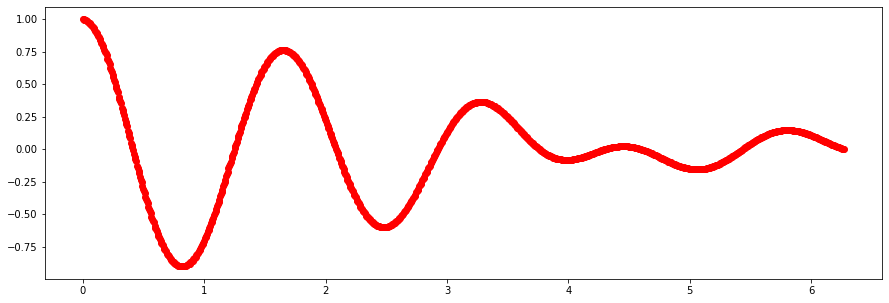

In [66]:
plt.figure(figsize=(15,5))
plt.plot(xt, np.abs(fou),'ro')
plt.figure(figsize=(15,5))
plt.plot(t, S*(1/10),'ro')

In [24]:
Steps=int(np.floor(Dur/h)) #Number of points to solve at
N=len(theta_v0)
    
theta_v=theta_v0
current_count=0
sol=np.empty(shape=(N,len(t)),dtype=np.complex) 

for k in range(0,Steps):
    theta_v=ThetaUpdateC(theta_v)
        
    if k*h>t[current_count]:
        sol[:,current_count]=theta_v
        current_count=current_count+1


In [26]:
current_count

998

In [14]:
h=0.01
N=10

omega_v=np.multiply(np.random.uniform(-1,1,N),3)
theta_v0=np.random.uniform(-np.pi,np.pi,N)
A=np.multiply(np.ones((N,N))-np.identity(N),1/2)


t=np.linspace(0,20*np.pi,1000)
y=KuraSolver(t,theta_v0,h,omega_v,A)

In [ ]:
#network of connected Triangles
h=0.02; #step size for Runge-Kutta
A=[[0,1,1,0,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[0,0,0,0,1,1,0,0,0],[0,0,0,1,0,1,0,0,0],[0,0,0,1,1,0,1,0,0],[0,0,0,0,0,0,0,1,1],[0,0,0,0,0,0,1,0,1],[0,0,0,0,0,0,1,1,0]]
A=np.multiply(A,50/9)
t = np.linspace(0,15*np.pi,500)
theta_v0=np.random.rand(9)
N=len(theta_v0);
omega_v=np.random.normal(0,2,N)

y=KuraSolver(t,theta_v0,h,omega_v,A)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\

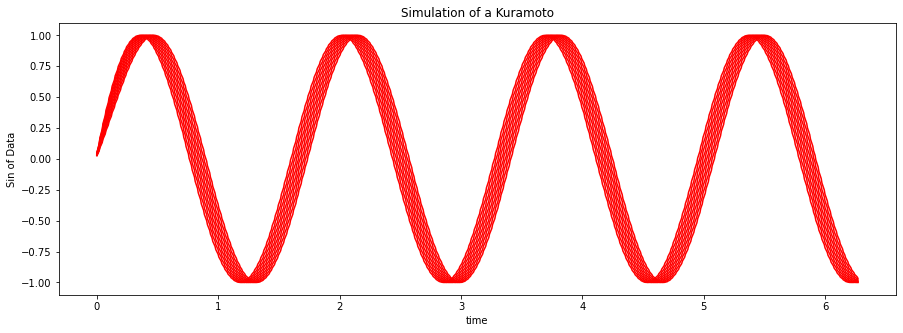

In [96]:
h         =0.005
Dur              =2*np.pi
K                = 5

omega_v          =np.multiply(np.linspace(0.5,1,10),5)
theta_v0         =np.zeros(10)


N=len(theta_v0)
A=np.multiply(np.ones((N,N))-np.identity(N),K/N)
t=np.linspace(0,Dur,1000,endpoint=False)
y=KuraSolver(t,theta_v0,h,omega_v,A)
t=t[0:-1]
SinY=np.sin(y)
fig, ax = plt.subplots(figsize=(15,5))

for s in range(0,N):
    ax.plot(t, SinY[s,:], 'r', label='1')
    
plt.title('Simulation of a Kuramoto')
plt.xlabel('time')
plt.ylabel('Sin of Data')

plt.show()

In [86]:
K


(0.2,)